0
Episode:0 avg: -200.0 min: -200.0 max: -200.0
500
Episode:500 avg: -200.0 min: -200.0 max: -200.0
1000
Episode:1000 avg: -199.226 min: -200.0 max: -123.0
1500
Episode:1500 avg: -192.112 min: -200.0 max: -123.0


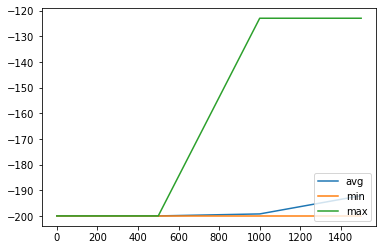

In [2]:
import gym
import time
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("MountainCar-v0")

# print(env.observation_space.high)
# print(env.observation_space.low)
# print(env.action_space.n)

LEARNING_RATE = 0.1
DISCOUNT = 0.95
EPISODES = 2000
SHOW_EVERY = 500
EPSILON = 0.5
START_EPSILON_DECAYING = 1
END_EPISION_DECAYING = EPISODES // 2

epsilon_decay_value = EPSILON/(END_EPISION_DECAYING - START_EPSILON_DECAYING)

#Q-table logic
DISCRETE_OS_SIZE = [20]*len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high-env.observation_space.low)/DISCRETE_OS_SIZE
#print(discrete_os_win_size)

q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE+[env.action_space.n]))
# print(q_table.shape)

ep_rewards = []
aggr_ep_reward = {"ep": [], "avg": [], "min":[], "max":[]}


def get_discrete_state(state):
    discrete_state = (state-env.observation_space.low)/discrete_os_win_size
    return tuple(discrete_state.astype(np.int))


for episode in range(EPISODES):
    episode_reward = 0
    if episode % SHOW_EVERY == 0:
        render = True
        print(episode)
    else:
        render = False
    
    discrete_state = get_discrete_state(env.reset())
    # print(discrete_state)
    # print(np.argmax(q_table[discrete_state]))

    done = False 
    while not done:
        if np.random.random() > EPSILON:
            action = np.argmax(q_table[discrete_state])
        else:
            action = np.random.randint(0, env.action_space.n)
        state_prime, reward, done, _ = env.step(action)
        episode_reward += reward
        #print(reward,state_prime)
        new_discrete_state = get_discrete_state(state_prime)
        if render:
            env.render()
        if not done:
            max_feature_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state + (action, )]

            new_q = (1-LEARNING_RATE)*current_q+LEARNING_RATE*(reward+DISCOUNT*max_feature_q)
            q_table[discrete_state+(action, )] = new_q

        elif state_prime[0] >= env.goal_position:
            q_table[discrete_state+(action, )] = 0

        discrete_state = new_discrete_state
    if END_EPISION_DECAYING >= episode >= START_EPSILON_DECAYING:
        EPSILON -= epsilon_decay_value
    ep_rewards.append(episode_reward)
    
    if not episode % SHOW_EVERY:
        average_reward = sum(ep_rewards[-SHOW_EVERY:])/len(ep_rewards[-SHOW_EVERY:])
        aggr_ep_reward["ep"].append(episode)
        aggr_ep_reward["avg"].append(average_reward)
        aggr_ep_reward["min"].append(min(ep_rewards[-SHOW_EVERY:]))
        aggr_ep_reward["max"].append(max(ep_rewards[-SHOW_EVERY:]))
        
        print(f"Episode:{episode} avg: {average_reward} min: {min(ep_rewards[-SHOW_EVERY:])} max: {max(ep_rewards[-SHOW_EVERY:])}")
              
    env.close()
              
plt.plot(aggr_ep_reward["ep"], aggr_ep_reward['avg'], label="avg")             
plt.plot(aggr_ep_reward["ep"], aggr_ep_reward['min'], label="min")             
plt.plot(aggr_ep_reward["ep"], aggr_ep_reward['max'], label="max")
plt.legend(loc=4)
plt.show()